# Predicting and analysing Cognitive Impairment Without Dementia

Cognitive impairment without dementia is associated with increased risk for disability, increased health care costs, and progression to dementia.As the diagnosis of this disease manually takes long hours and the lesser availability of systems, there is a need to develop the automatic diagnosis system for early detection of cancer. Data mining techniques contribute a lot in the development of such system. For the classification of benign and malignant tumor we have used classification techniques of machine learning in which the machine is learned from the past data and can predict the category of new input.¶


## Data Analysis and Machine Learning Model for the data

#### Our aim is to predict patients with Cognitive Impairment without dementia by analyzing the datat into two categories:
1. Have Cognitive Impairment Without Dementia
2. Cognitive Impairment Without Dementia

### Libraries Used:
- #### pandas 
An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- #### matplotlib 
Matplotlib is a plotting library for the Python programming language
- #### sklearn 
A machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines,KNeighborsClassifier,LinearSVC
- #### Seaborn 
It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



## Importing libraries

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

## The Data

The data has many columns, few of which have been mentioned:

{NPI1SEV	NPI1D	NPI2SEV	NPI2DIS	NPI4SEV	NPI4DIS	NPI5SEV	NPI5DIS	NPI6SEV	NPI6DIS	NPI7	NPI7SEV	NPI7DIS	NPI8SEV	NPI8DIS	NPI9SEV	NPI9DIS	NPI10SEV	NPI10DIS	NPI11SEV	NPI11DIS	NPI12SEV	NPI12DIS	cnof_tot	c_tot	WATCH	SHOES	comorbid_type	comorbid	Nparks	frweekly}


### Reading the data

In [462]:
#Loading the data and setting the values for X(non-class attributes) and y(target variable)
data=pd.read_csv('abc.csv')
df=data
print("Data set dimensions : {}".format(df.shape))

Data set dimensions : (193, 1231)


Setting the frame value

In [463]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,centreid,HOUSEID,PARTICID,houseid2,countryid,region,rural,DATE,INTERID,age,agegrp,agegrp2,gender,PMARRY,PEDUC,INFORMANT_M,CARERAGE,CARERSEX,CARERREL,CARELIVE,CAREMAR,CAREEDUC,CJOB,CJOBCAT,CBNTYPE1,CBEN1,CBNTYPE2,CBEN2,CBNTYPE3,CBEN3,CBNTYPE4,CBEN4,AM1,PM1,EVE1,NITE1,AM2,PM2,EVE2,NITE2,SRQ1,SRQ2,SRQ3,SRQ4,SRQ5,SRQ6,SRQ7,SRQ8,SRQ9,SRQ10,SRQ11,SRQ12,SRQ13,SRQ14,SRQ15,SRQ16,SRQ17,SRQ18,SRQ19,SRQ20,CARENEED,CAREWHO1,CAREWHO2,CUTBACK,CUTWHEN,CUTHOUR,CAREHELP,HELPHOUR,HELPWEEK,HELPJOB,DAYPAID,NTPAID,CASHRS1,CASHRS2,CASHRS3,CASHRS4,CASHRS5,CASHRS6,CASHRS7,CASHRS8,ZB1,ZB2,ZB3,ZB4,ZB5,ZB6,ZB7,ZB8,ZB9,ZB10,ZB11,ZB12,ZB13,ZB14,ZB15,ZB16,ZB17,ZB18,ZB19,ZB20,ZB21,ZB22,ACTIV,MENTAL,MEMORY,PUT,KEPT,FRDNAME,FAMNAME,CONVERS,WORDFIND,WORDWRG,PAST,LASTSEE,LASTDAY,ORIENT,LOSTOUT,LOSTIN,CHORES,CHOREDIS,HOBBY,MONEY,CHANGE,REASON,FEED,FEEDDIS,DRESS,DRESSDIS,TOILET,TOILDIS,MISTAKE,DECIDE,MUDDLED,TIMEONS,TYPEONS,ONS1,ONS2,ONS3,ONS4,ONS5,ONS6,ONS7,ONS8,ONS9,ONS10,ONS11,ONS12,ONS13,ONS14,ONS15,ONS16,ONS17,ONS18,ONS19,ONS20,ONS21,ONS221,FLUCT,FLUCTCOG,FLUCTOFT,GRADDEC,STEPWISE,STEP1,STEP3,STEP2,STEP4,STEPPRE1,STEPPRE3,STEPPRE2,STEPPRE4,STEPREC1,STEPREC3,STEPREC2,STEPREC4,CLOUDING,CONFNITE,CONFDAY,NOCTURN,BCHANGE,BSUSPIC,BIRRIT,BACCUSE,BUPSET,BFIRST,BVIS,BAUD,BDELUDE,DEPRESS,DEPDUR,CRY,CRYDUR,WISHDIE,INTEREST,ANHED,SLEEP,EAT,BEREAVE,BERWHEN,DEPIMP,TOLDBP,TREATBP,CVEVENT,CVTYPE1,CVDATE1,CVTYPE2,CVDATE2,CVTYPE3,CVDATE3,CVTYPE4,CVDATE4,AFFINCON,ANGINA,INTCLAUD,MIDIAG,PARK,TREMOR,INITIATE,SLOW,MICROG,FALLSNO,ALCPAST,ALCNOW,HEAVYALC,ALCTREAT,ALCPROB,HYPOTHY,HYPERTHY,HI,HILL,LOC,BEHCHANG,FITSEVER,LONGFITS,EARLYCHG,NPI1,NPI1SEV,NPI1D,NPI2,NPI2SEV,NPI2DIS,NPI3,NPI3SEV,NPI3DIS,NPI4,NPI4SEV,NPI4DIS,NPI5,NPI5SEV,NPI5DIS,NPI6,NPI6SEV,NPI6DIS,NPI7,NPI7SEV,NPI7DIS,NPI8,NPI8SEV,NPI8DIS,NPI9,NPI9SEV,NPI9DIS,NPI10,NPI10SEV,NPI10DIS,NPI11,NPI11SEV,NPI11DIS,NPI12,NPI12SEV,NPI12DIS,HASCONF,Miss1,Miss3,misstot,srqtot,srqcase,zbmiss,zbtot,c_family,c_gov,c_occup,c_disab,c_rent,c_work,c_care,c_oth,cnof_tot,c_tot,tw_dep,tadl,npisev,npidis,COGNITIVE_M,LEARN1,LEARN2,LEARN3,NAME,PENCIL,WATCH,CHAIR,SHOES,KNUCKLE,ELBOW,SHOULD,BRIDGE,HAMMER,PRAY,CHEMIST,REPEAT,NRECALL,ANIMALS,WORDIMM,TRIALNO,TOWN,CHIEF,STREET,STORE,ADDRESS,WORDDEL,LONGMEM,MONTH,DAY,YEAR,SEASON,NOD,POINT,PAPER,CIRCLE,PENTAG,STORY,GMS_M,Q11,Q21,Q31,Q32,Q41,Q42,Q51,Q52,Q53,Q54,Q71,Q72,Q73,Q74,Q75,Q76,Q81,Q82,Q83,Q91,Q92,Q93,Q101,Q102,Q111,XXX2,Q161,Q162,Q163,Q164,Q141,Q142,Q151,Q171,Q181,Q191,Q201,Q211,Q221,Q231,Q241,Q242,Q243,Q251,Q261,Q262,Q263,Q271,Q272,Q281,Q291,Q292,Q293,Q294,Q301,Q311,Q312,Q313,Q321,Q322,Q331,Q332,Q333,Q334,Q335,Q341,Q351,Q352,Q361,Q362,Q363,Q364,Q365,Q371,Q381,Q391,Q401,Q451,Q452,Q471,Q481,Q491,Q501,Q502,Q511,Q512,Q521,Q522,Q523,Q531,Q532,Q533,Q541,Q542,Q543,Q544,Q545,Q551,Q561,Q571,Q581,Q582,Q611,Q612,Q613,Q621,Q631,Q641,Q642,Q643,Q644,Q651,Q652,Q711,Q721,Q722,Q731,Q741,Q751,Q752,Q753,Q761,Q771,Q781,Q871,Q881,Q882,Q891,Q901,Q911,Q921,Q922,Q923,Q931,Q941,Q951,Q952,Q961,Q971,Q981,Q982,Q991,Q1001,Q1002,Q1003,Q1011,Q1012,Q1021,Q1022,Q1031,Q1041,Q1042,Q1043,Q1044,Q1051,Q1052,Q1061,Q1131,Q1141,Q1151,Q1152,Q1153,Q1161,Q1171,Q1181,Q1182,Q1191,Q1201,Q1211,Q1221,Q1222,Q1231,Q1232,Q1233,Q1241,Q1242,Q1251,Q1271,Q1281,Q1291,Q1301,Q1302,Q1303,Q1304,Q1305,Q1306,Q1307,Q1351,Q1361,Q1362,Q1363,Q1364,Q1365,Q1366,Q1367,Q1368,Q1371,Q1381,Q1391,Q1401,Q1411,Q1412,Q1421,Q1431,Q1441,Q1451,Q1452,Q1453,Q1454,Q1551,Q1561,Q1581,Q1582,Q1591,Q1601,Q1602,Q1611,Q1621,Q1631,Q1632,Q1633,Q1634,Q1635,Q1641,Q1642,Q1651,Q1652,Q1661,Q1671,Q1701,Q1702,Q1703,Q1704,Q1705,Q1706,Q1707,Q1708,Q1709,Q1741,Q1742,Q1743,Q1744,Q1745,Q1751,Q1752,Q1753,Q1754,Q1755,Q1771,Q1781,Q1791,Q1792,q1794,q1795,q1796,q1798,q1799,q17910,q17911,q17912,q17913,q17914,q17920,q17921,ivcondit,q17922,q17923,Q1801,Q1802,Q1803,Q1804,Q1805,Q1806,Q1807,Q1808,Q1809,Q18010,Q18011,Q18012,Q18013,Q18014,Q18015,Q18016,Q18017,Q18018,Q18019,Q18020,Q1811,Q1821,Q1822,BACKGROUND_M,PINTER,PLIVED,PBORN,PMIDLIFE,PLATLIFE,PREAD,PWRITE,PHEADHSE,PREL,PRELIG,PGOCHCH,PCLUBS,PRELDIST,PSIBDIST,

In [464]:
df.describe()

,centreid,HOUSEID,PARTICID,houseid2,countryid,region,rural,INTERID,PMARRY,CARERAGE,CARERSEX,CARELIVE,CAREMAR,CAREEDUC,SRQ1,SRQ2,SRQ3,SRQ4,SRQ5,SRQ6,SRQ7,SRQ8,SRQ9,SRQ10,SRQ11,SRQ12,SRQ13,SRQ14,SRQ15,SRQ16,SRQ17,SRQ18,SRQ19,SRQ20,ACTIV,MENTAL,MEMORY,PUT,KEPT,FRDNAME,FAMNAME,CONVERS,WORDFIND,WORDWRG,PAST,LASTSEE,LASTDAY,ORIENT,LOSTOUT,LOSTIN,CHORES,HOBBY,MONEY,CHANGE,REASON,FEED,DRESS,TOILET,MISTAKE,DECIDE,MUDDLED,NPI1,NPI1SEV,NPI1D,NPI2,NPI2SEV,NPI2DIS,NPI3,NPI4,NPI4SEV,NPI4DIS,NPI5,NPI5SEV,NPI5DIS,NPI6,NPI6SEV,NPI6DIS,NPI7,NPI7SEV,NPI7DIS,NPI8,NPI8SEV,NPI8DIS,NPI9,NPI9SEV,NPI9DIS,NPI10,NPI10SEV,NPI10DIS,NPI11,NPI11SEV,NPI11DIS,NPI12,NPI12SEV,NPI12DIS,HASCONF,Miss1,Miss3,misstot,srqtot,srqcase,zbmiss,c_family,c_gov,c_occup,c_disab,c_rent,c_work,c_care,c_oth,cnof_tot,c_tot,tadl,LEARN1,LEARN2,LEARN3,NAME,PENCIL,WATCH,CHAIR,SHOES,KNUCKLE,ELBOW,SHOULD,BRIDGE,HAMMER,PRAY,CHEMIST,REPEAT,NRECALL,ANIMALS,WORDIMM,TOWN,CHIEF,STREET,STORE,ADDRESS,WORDDEL,LONGMEM,MONTH,DAY,YEAR,SEASON,NOD,POINT,PAPER,CIRCLE,PENTAG,STORY,Q11,Q21,Q31,Q32,Q41,Q42,Q71,Q72,Q73,Q74,Q75,Q76,Q81,Q82,Q83,Q101,Q102,Q111,XXX2,Q171,Q191,Q201,Q211,Q221,Q281,Q291,Q292,Q293,Q294,Q301,Q331,Q341,Q351,Q352,Q361,Q371,Q381,Q391,Q401,Q451,Q452,Q481,Q491,Q501,Q502,Q511,Q512,Q531,Q532,Q533,Q541,Q611,Q612,Q613,Q621,Q641,Q642,Q643,Q644,Q651,Q652,Q711,Q871,Q901,Q911,Q1031,Q1041,Q1042,Q1043,Q1044,Q1051,Q1052,Q1061,Q1131,Q1141,Q1181,Q1191,Q1201,Q1211,Q1221,Q1222,Q1231,Q1232,Q1233,Q1241,Q1242,Q1251,Q1271,Q1361,Q1371,Q1381,Q1391,Q1441,Q1551,Q1561,Q1631,Q1632,Q1633,Q1634,Q1635,Q1641,Q1642,Q1651,Q1652,Q1661,Q1671,Q1701,Q1702,Q1703,Q1704,Q1705,Q1741,Q1742,Q1743,Q1744,Q1745,Q1751,Q1752,Q1753,Q1754,Q1755,Q1771,Q1781,Q1791,Q1792,q1794,q1795,q1796,q1798,q1799,q17910,q17911,q17912,q17913,q17914,q17920,q17921,ivcondit,q17922,q17923,Q1801,Q1802,Q1803,Q1804,Q1805,Q1806,Q1807,Q1808,Q1809,Q18010,Q18011,Q18012,Q18013,Q18014,Q18015,Q18016,Q18017,Q18018,Q18019,Q18020,Q1811,PBORN,PMIDLIFE,PLATLIFE,PHEADHSE,PRELIG,PGOCHCH,PCLUBS,PRELDIST,PSIBDIST,PCHDIST,PFRD,PFRDFRQ,PJOB,PINCOME,PTOLDHRT,PCVA,PTIA,PLOC,PTOLDDM,PMAL,PTB,PCYST,PPASTHX,PFHDEM,PARTH,PEYE,PEAR,PCOUGH,PRESP,PBP,PHEAR,PGUT,PFAINT,PLIMB,PSKIN,PPAIN1,PPAIN2,PPAIN3,PPC,PPCCARE,PPCTRMIN,PPCTRCST,PPCMINS,PPCCOST,PPCVIS,PHOSP,PHPCARE,PHPTRMIN,PHPTRCST,PHPMINS,PHPCOST,PHPVIS,POTH,POTCARE,POTTRMIN,POTTRCST,POTMINS,POTCOST,POTVIS,PPD,PPDCARE,PPDTRMIN,PPDTRCST,PPDMINS,PPDCOST,PPDVIS,PDENT,PDENCARE,PDENTRMI,PDENTRCT,PDENMINS,PDENCOST,PDENVIS,PTH,PTHCARE,PTHTRMIN,PTHTRCST,PTHMINS,PTHCOST,PTHVIS,PHOSAD,PHOSDAY,PHOSCOST,PMEDS,wenger,p_family,p_gov,p_occup,p_disab,p_rent,p_work,p_care,p_oth,pnof_tot,p_tot,PULSE,BPSYS1,BPDIAS1,BPSYS2,BPDIAS2,BPSYS3,BPDIAS3,ARMCIRC,WSTCIRC,NOE1,NOE3B,NOE2A,NOE2B,NEO4B,NEO4E,NEO4F,NEO5A,NEO6AU,NEO6AL,NEO6BU,NEO6BL,NEO6CU,NEO6CL,NEO6DU,NEO6DL,DOMHAND,NEO7A,NEO7B,NEO7C,NEO7D,NEO7E,NEO7F,HAND,NEO8A,NEO8B,NEO8C,NEO8D,NEO11A,NEO11B,NEO11C,NEO11D,NEO11E,NEO12C,NEO13D,NEO14E,NEO14G,rdrift,ldrift,lkreflex,rkreflex,lbreflex,rbreflex,rulrigid,lulrigid,rllrigid,lllrigid,rswing,lswing,rffm,lffm,raltcord,laltcord,lkbrisk,rkbrisk,lbbrisk,rbbrisk,rcva,lcva,lassym,rassym,assym,parkstep,parktime,parks,ACCSTAT,ROOMS,TV,FRIDGE,WATER,ELEC,PHONE,BATH,r_spouse,r_child,r_inlaw,r_sibs,r_othrel,r_friend,r_other,r_cores,reswith,reswith2,kidswith,mardic,cores_younger,alone,impmem,imprec,impimmed,impmemno,infmem1,infmem2,infmem,crita1,crita21,langfrq,langocc,apraxia,crita22,crita23,crita24,exec,impanim,critota2,crita2,critb1,selfmem,memprob,genprob,critb2,critc,critd,crita,critb,dsmcrit,dsmcase,cdem1066,anydem,demstat,cdrcare,cdrchore,cdrjudge,cdrorient,cdrmem,cdrcomm,cdr,cdrbox,cdemrev,fhvalno,fhdemcorr,dysthym,anhedon,dsmappet,dsmsleep,fatigue,dsmguilt,dsmconc,dsmsuic,dsmslow,dsmcata,dsmcatb,majdepsx,dsmdisab,majdep,icdcata,icdconc,icdconf,icdguilt,icdfutur,icdsuic,icdsleep,icdappet,icdcatb,icdmild,icdmod,icdsev,icddep,icdgrade,depcase,euro1,euro2,euro3,euro4,euro5,euro6,euro7,euro8,euro11,euro12,eurodmv,eurodtot,eurocase,eurocase45,organic,schiz,dep,a

## Data Cleaning

### Checking for null values

In [465]:
df.isnull().any().sum()

0

### Checking for null values

In [466]:
df.duplicated().any().sum()

0

### Reshaping the data

#### Converting categorical values to numeric values

In [467]:
df=pd.get_dummies(df)
df.sample(5)

centreid  HOUSEID  PARTICID  houseid2  countryid  region  rural  INTERID  \
160  12        1856     1         1201856   8          3       0      8         
155  12        1849     1         1201849   8          3       0      8         
10   12        1071     1         1201071   8          3       0      1         
31   12        1187     1         1201187   8          3       0      1         
175  12        1891     1         1201891   8          3       0      8         

     PMARRY  CARERAGE  CARERSEX  CARELIVE  CAREMAR  CAREEDUC  SRQ1  SRQ2  \
160  3       50        1         1         2        2         1     0      
155  2       39        1         1         2        1         0     0      
10   2       35        1         1         2        2         0     0      
31   2       44        1         1         2        3         1     0      
175  2       55        1         1         2        1         1     1      

     SRQ3  SRQ4  SRQ5  SRQ6  SRQ7  SRQ8  SRQ9  SRQ10  SRQ11  SRQ12  SRQ13  \
160  0     0     0     0     0     0     0     0      0      0      0       
155  0     0     0     0     0     0     0     0      0      0      0       
10   0     0     0     0     0     0     0     0      0      0      0       
31   0     0     0     0     0     0     0     0      0      0      0       
175  1     0     0     1     0     0     0     1      0      0      0       

     SRQ14  SRQ15  SRQ16  SRQ17  SRQ18  SRQ19  SRQ20  ACTIV  MENTAL  MEMORY  \
160  0      0      0      0      1      0      1      0      0       0        
155  0      0      0      0      1      0      1      1      0       1        
10   0      0      0      0      0      0      0      0      0       0        
31   0      0      0      0      0      0      0      0      0       1        
175  0      0      0      0      1      0      1      0      0       1        

     PUT  KEPT  FRDNAME  FAMNAME  CONVERS  WORDFIND  WORDWRG  PAST  LASTSEE  \
160  0    0     0        0        0        0         0        0     0         
155  0    0     0        0        0        0         0        0     0         
10   0    0     0        0        0        0         0        0     0         
31   1    0     0        0        0        0         0        0     0         
175  0    0     0        0        0        0         0        0     0         

     LASTDAY  ORIENT  LOSTOUT  LOSTIN  CHORES  HOBBY  MONEY  CHANGE  REASON  \
160  0        0       0        0       0       0      0      0       0        
155  0        0       0        0       0       0      0      0       0        
10   0        0       0        0       0       0      0      0       0        
31   0        0       0        0       0       0      0      0       0        
175  0        0       0        0       0       0      0      0       0        

     FEED  DRESS  TOILET  MISTAKE  DECIDE  MUDDLED  NPI1  NPI1SEV  NPI1D  \
160  0     0      0       0        0       0        0     0        0       
155  0     0      0       0        0       0        0     0        0       
10   0     0      0       0        0       0        0     0        0       
31   0     0      0       0        0       0        0     0        0       
175  0     0      0       0        0       0        0     0        0       

     NPI2  NPI2SEV  NPI2DIS  NPI3  NPI4  NPI4SEV  NPI4DIS  NPI5  NPI5SEV  \
160  0     0        0        1     0     0        0        0     0         
155  0     0        0        1     1     3        4        0     0         
10   0     0        0        0     0     0        0        0     0         
31   0     0        0        0     0     0        0        0     0         
175  0     0        0        1     0     0        0        0     0         

     NPI5DIS  NPI6  NPI6SEV  NPI6DIS  NPI7  NPI7SEV  NPI7DIS  NPI8  NPI8SEV  \
160  0        0     0        0        0     0        0        0     0         
155  0        0     0        0        0     0        0        0     0         
10   0        0     0 

In [468]:
df.shape

(193, 3477)

## Data Pre-Processing

### Feature Selection

In [469]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.88
to_drop_great = [column for column in upper.columns if any(upper[column] > 0.89)]

In [470]:
def get_top_abs_correlations(dfa, n=10):
    au_corr = df.corr().abs().unstack()
    au_corr = au_corr.sort_values(ascending=False)
    return au_corr[0:n]
get_top_abs_correlations(df, n=10)

DATE_01/23/2004            Q1361                        1.0
Q1361                      DATE_01/23/2004              1.0
trunk_51                   Q1361                        1.0
Q1361                      trunk_51                     1.0
                           HEIGHT_137                   1.0
                           whratio_0.967032967032967    1.0
HEIGHT_137                 Q1361                        1.0
whratio_0.967032967032967  Q1361                        1.0
Q1031                      PVEGS_0                      1.0
PVEGS_0                    Q1031                        1.0
dtype: float64

### Dimensionality Reduction

In [471]:
df.drop(df.columns.difference(to_drop_great), 1, inplace=True)

In [472]:
df.shape

(193, 1525)

In [474]:
df=df.select_dtypes(exclude=['string'])

In [511]:
X=df[df.columns[:]]
y=df.cind

### Outlier Detection

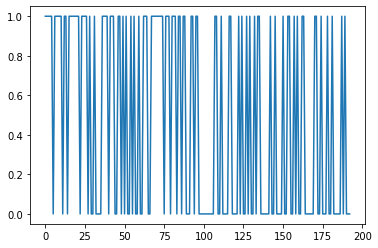

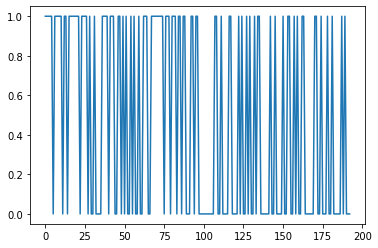

In [476]:
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
y[removed_outliers].plot().get_figure()

In [477]:
removed_outliers.value_counts()

True    193
Name: cind, dtype: int64

Since there are no values corresponding to False, we conclude that the dataset has no outliers.

### Aggregation

In [478]:
df.aggregate({"cind":['sum']})

,cind
sum,92


Out of 193 records, 92 people have Cognitive impairment without dementia

### Random Sampling

In [512]:
df.sample(5)

,houseid2,MONEY,NPI1SEV,NPI1D,NPI2SEV,NPI2DIS,NPI4SEV,NPI4DIS,NPI5SEV,NPI5DIS,NPI6SEV,NPI6DIS,NPI7SEV,NPI7DIS,NPI8SEV,NPI8DIS,NPI9SEV,NPI9DIS,NPI10DIS,NPI11SEV,NPI11DIS,NPI12SEV,NPI12DIS,WATCH,Q72,Q73,Q74,Q75,Q76,Q83,Q613,Q651,Q1043,Q1044,Q1231,Q1441,Q1632,Q1633,Q1634,Q1635,Q1701,Q1702,Q1742,Q1743,Q1744,Q1745,Q1754,Q1781,q1799,Q1806,Q1807,Q18014,Q18016,Q18018,PTIA,PTB,PPAIN2,PPAIN3,PPCTRCST,PPCMINS,PPCVIS,PHPCARE,PHPMINS,PHPCOST,POTCARE,POTTRMIN,POTMINS,PDENT,PDENCARE,PDENTRMI,PDENTRCT,PDENMINS,PDENCOST,PDENVIS,PHOSDAY,PHOSCOST,p_tot,BPSYS2,BPDIAS2,BPSYS3,BPDIAS3,NEO4F,NEO7B,NEO7D,NEO7F,NEO11B,NEO11E,NEO14E,rulrigid,rllrigid,raltcord,rkbrisk,lbbrisk,rbbrisk,lcva,infmem,crita2,critb1,genprob,critb2,critb,cdrchore,cdrcomm,cdr,fhvalno,fhdemcorr,dsmguilt,majdepsx,icdconc,icdconf,icdguilt,icdfutur,icdsuic,icdsleep,icdappet,icdsev,icdgrade,euro1,euro2,euro3,euro4,euro5,euro6,euro7,euro8,euro11,euro12,schiz,dep,relscore_original,conditions,dfscore,immed,recall_original,langcomp,language,cind,smitot,smicase,mciadl,mcimem,mci,mcinosmi,mcinonam_pure,Nassets,assetdic,inc_occpens,inc_dispens,inc_work,inc_anypens,servany,medserv,medservno,pc_cost,pd_cost,den_cost,cvadiag,pain,illnocat,blind3,deaf_select,FR_weight_loss,FR_exhaust,adl3plus,bpsys,bpdias,anyhyper_treat,JNC_crit,control_prop,overall_prop,cvdrfany_nohyper,cvascore,status,comorbid_type,comorbid,Nparks,frweekly,DATE_01/14/2004,DATE_01/23/2004,DATE_02/14/2006,DATE_02/20/2004,DATE_03/04/2004,DATE_03/04/2005,DATE_03/10/2005,DATE_03/23/2005,DATE_04/01/2005,DATE_04/22/2004,DATE_05/06/2004,DATE_05/19/2005,DATE_08/11/2005,DATE_10/12/2004,DATE_11/23/2003,DATE_12/06/2004,DATE_12/13/2004,DATE_12/15/2004,DATE_12/21/2005,DATE_12/24/2005,age_,age_81,age_87,agegrp_,agegrp2_,agegrp2_1,agegrp2_2,agegrp2_3,agegrp2_6,gender_2,PEDUC_,CARERREL_,CARERREL_8,CJOBCAT_9,CBNTYPE1_8,CBEN1_2430,CBEN1_6250,CBEN1_7500,CBEN1_800,CBNTYPE2_4,CBEN2_,CBEN2_10000,CBEN2_3000,CBEN2_6250,CBEN2_8000,CBNTYPE3_3,CBNTYPE3_4,CBEN3_,CBEN3_6250,CBEN3_9000,CBNTYPE4_1,CBEN4_,CBEN4_3000,CBEN4_6250,CBEN4_8000,AM1_,PM1_,EVE1_,EVE1_1,NITE1_,NITE1_0,NITE1_1,NITE1_2,AM2_,AM2_0,AM2_1,AM2_2,PM2_,PM2_0,PM2_1,PM2_2,EVE2_,EVE2_0,EVE2_1,EVE2_2,NITE2_,NITE2_0,NITE2_1,NITE2_2,CARENEED_1,CARENEED_2,CAREWHO1_1,CAREWHO1_3,CAREWHO2_,CAREWHO2_1,CUTBACK_,CUTBACK_2,CUTBACK_3,CUTWHEN_,CUTWHEN_0,CUTHOUR_,CUTHOUR_2,CAREHELP_,CAREHELP_1,HELPHOUR_,HELPHOUR_1,HELPWEEK_,HELPWEEK_0,DAYPAID_,DAYPAID_1,NTPAID_,NTPAID_1,CASHRS1_,CASHRS1_0,CASHRS2_,CASHRS2_1,CASHRS3_,CASHRS3_0,CASHRS4_,CASHRS4_0,CASHRS5_,CASHRS5_0,CASHRS6_,CASHRS6_0,CASHRS7_,CASHRS7_0,CASHRS8_,CASHRS8_0,ZB1_,ZB1_0,ZB2_,ZB2_0,ZB3_,ZB3_0,ZB4_,ZB4_0,ZB5_,ZB5_0,ZB6_,ZB6_0,ZB7_,ZB7_0,ZB8_,ZB8_0,ZB9_,ZB9_0,ZB10_,ZB10_0,ZB11_,ZB11_0,ZB12_,ZB12_0,ZB13_,ZB13_0,ZB14_,ZB14_0,ZB15_,ZB15_0,ZB16_,ZB16_0,ZB17_,ZB17_0,ZB18_,ZB18_0,ZB19_,ZB19_0,ZB20_,ZB20_0,ZB21_,ZB21_0,ZB22_,ZB22_0,CHOREDIS_0,FEEDDIS_,FEEDDIS_0,DRESSDIS_,DRESSDIS_0,TOILDIS_,TOILDIS_0,TIMEONS_,TIMEONS_1,TYPEONS_,TYPEONS_3,ONS1_,ONS1_0,ONS2_,ONS2_0,ONS3_,ONS3_0,ONS3_1,ONS4_,ONS4_0,ONS4_1,ONS5_,ONS5_0,ONS5_1,ONS6_,ONS6_0,ONS7_,ONS7_0,ONS8_,ONS8_0,ONS9_,ONS9_0,ONS10_,ONS10_0,ONS10_1,ONS11_,ONS11_0,ONS12_,ONS12_0,ONS13_,ONS13_0,ONS14_,ONS14_0,ONS15_,ONS15_0,ONS16_,ONS16_0,ONS17_,ONS17_0,ONS18_,ONS18_0,ONS19_,ONS19_0,ONS20_,ONS20_0,ONS21_,ONS21_0,ONS221_,ONS221_1,FLUCT_,FLUCT_0,GRADDEC_,GRADDEC_1,STEPWISE_,STEPWISE_0,CLOUDING_,CLOUDING_0,CONFNITE_,CONFNITE_0,CONFDAY_,CONFDAY_0,BCHANGE_,BCHANGE_1,BSUSPIC_,BSUSPIC_1,BIRRIT_,BIRRIT_1,BACCUSE_,BACCUSE_0,BUPSET_,BUPSET_0,BVIS_,BVIS_0,BAUD_,BAUD_0,BDELUDE_,BDELUDE_0,DEPRESS_,DEPRESS_0,DEPRESS_1,DEPDUR_,DEPDUR_3,CRY_,CRY_0,CRY_1,CRYDUR_,CRYDUR_0,WISHDIE_,WISHDIE_0,INTEREST_,INTEREST_0,ANHED_,ANHED_0,SLEEP_,SLEEP_1,EAT_,EAT_0,BEREAVE_,BEREAVE_0,DEPIMP_,DEPIMP_0,TOLDBP_,TOLDBP_0,CVEVENT_,CVEVENT_0,AFFINCON_,AFFINCON_0,ANGINA_,ANGINA_0,INTCLAUD_,INTCLAUD_0,MIDIAG_,MIDIAG_0,PARK_,PARK_0,TREMOR_,TREMOR_2,INITIATE_,INITIATE_0,SLOW_,SLOW_0,MICROG_,MICROG_0,FALLSNO_,FALLSNO_0,ALCPAST_,ALCPAST_1,ALCNOW_,ALCNOW_1,H

## Data Visualization

#### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

In [479]:
'''plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True);'''

'plt.figure(figsize=(15,12))\nsns.heatmap(df.corr(),annot=True);'

#### Bar plots showing number of people having Cognitive Impairment without Dementia

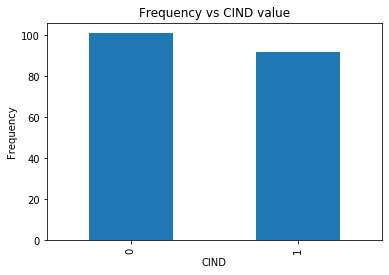

In [480]:
df.cind.value_counts().plot(kind='bar');
plt.ylabel('Frequency');
plt.xlabel('CIND');
plt.title('Frequency vs CIND value');

## Model Building

### Splitting into train and test sets

In [481]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=90)

### Scaling and normalizing the data

In [482]:
train_norm=X_train[X_train.columns[:135]]
test_norm=X_test[X_test.columns[:135]]

In [483]:
std_scale=preprocessing.StandardScaler().fit(train_norm)
X_train_norm=std_scale.transform(train_norm)

In [484]:
training_norm_col=pd.DataFrame(X_train_norm,index=train_norm.index,columns=train_norm.columns)
X_train.update(training_norm_col)
X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,houseid2,MONEY,NPI1SEV,NPI1D,NPI2SEV,NPI2DIS,NPI4SEV,NPI4DIS,NPI5SEV,NPI5DIS,NPI6SEV,NPI6DIS,NPI7SEV,NPI7DIS,NPI8SEV,NPI8DIS,NPI9SEV,NPI9DIS,NPI10DIS,NPI11SEV,NPI11DIS,NPI12SEV,NPI12DIS,WATCH,Q72,Q73,Q74,Q75,Q76,Q83,Q613,Q651,Q1043,Q1044,Q1231,Q1441,Q1632,Q1633,Q1634,Q1635,Q1701,Q1702,Q1742,Q1743,Q1744,Q1745,Q1754,Q1781,q1799,Q1806,Q1807,Q18014,Q18016,Q18018,PTIA,PTB,PPAIN2,PPAIN3,PPCTRCST,PPCMINS,PPCVIS,PHPCARE,PHPMINS,PHPCOST,POTCARE,POTTRMIN,POTMINS,PDENT,PDENCARE,PDENTRMI,PDENTRCT,PDENMINS,PDENCOST,PDENVIS,PHOSDAY,PHOSCOST,p_tot,BPSYS2,BPDIAS2,BPSYS3,BPDIAS3,NEO4F,NEO7B,NEO7D,NEO7F,NEO11B,NEO11E,NEO14E,rulrigid,rllrigid,raltcord,rkbrisk,lbbrisk,rbbrisk,lcva,infmem,crita2,critb1,genprob,critb2,critb,cdrchore,cdrcomm,cdr,fhvalno,fhdemcorr,dsmguilt,majdepsx,icdconc,icdconf,icdguilt,icdfutur,icdsuic,icdsleep,icdappet,icdsev,icdgrade,euro1,euro2,euro3,euro4,euro5,euro6,euro7,euro8,euro11,euro12,schiz,dep,relscore_original,conditions,dfscore,immed,recall_original,langcomp,language,cind,smitot,smicase,mciadl,mcimem,mci,mcinosmi,mcinonam_pure,Nassets,assetdic,inc_occpens,inc_dispens,inc_work,inc_anypens,servany,medserv,medservno,pc_cost,pd_cost,den_cost,cvadiag,pain,illnocat,blind3,deaf_select,FR_weight_loss,FR_exhaust,adl3plus,bpsys,bpdias,anyhyper_treat,JNC_crit,control_prop,overall_prop,cvdrfany_nohyper,cvascore,status,comorbid_type,comorbid,Nparks,frweekly,DATE_01/14/2004,DATE_01/23/2004,DATE_02/14/2006,DATE_02/20/2004,DATE_03/04/2004,DATE_03/04/2005,DATE_03/10/2005,DATE_03/23/2005,DATE_04/01/2005,DATE_04/22/2004,DATE_05/06/2004,DATE_05/19/2005,DATE_08/11/2005,DATE_10/12/2004,DATE_11/23/2003,DATE_12/06/2004,DATE_12/13/2004,DATE_12/15/2004,DATE_12/21/2005,DATE_12/24/2005,age_,age_81,age_87,agegrp_,agegrp2_,agegrp2_1,agegrp2_2,agegrp2_3,agegrp2_6,gender_2,PEDUC_,CARERREL_,CARERREL_8,CJOBCAT_9,CBNTYPE1_8,CBEN1_2430,CBEN1_6250,CBEN1_7500,CBEN1_800,CBNTYPE2_4,CBEN2_,CBEN2_10000,CBEN2_3000,CBEN2_6250,CBEN2_8000,CBNTYPE3_3,CBNTYPE3_4,CBEN3_,CBEN3_6250,CBEN3_9000,CBNTYPE4_1,CBEN4_,CBEN4_3000,CBEN4_6250,CBEN4_8000,AM1_,PM1_,EVE1_,EVE1_1,NITE1_,NITE1_0,NITE1_1,NITE1_2,AM2_,AM2_0,AM2_1,AM2_2,PM2_,PM2_0,PM2_1,PM2_2,EVE2_,EVE2_0,EVE2_1,EVE2_2,NITE2_,NITE2_0,NITE2_1,NITE2_2,CARENEED_1,CARENEED_2,CAREWHO1_1,CAREWHO1_3,CAREWHO2_,CAREWHO2_1,CUTBACK_,CUTBACK_2,CUTBACK_3,CUTWHEN_,CUTWHEN_0,CUTHOUR_,CUTHOUR_2,CAREHELP_,CAREHELP_1,HELPHOUR_,HELPHOUR_1,HELPWEEK_,HELPWEEK_0,DAYPAID_,DAYPAID_1,NTPAID_,NTPAID_1,CASHRS1_,CASHRS1_0,CASHRS2_,CASHRS2_1,CASHRS3_,CASHRS3_0,CASHRS4_,CASHRS4_0,CASHRS5_,CASHRS5_0,CASHRS6_,CASHRS6_0,CASHRS7_,CASHRS7_0,CASHRS8_,CASHRS8_0,ZB1_,ZB1_0,ZB2_,ZB2_0,ZB3_,ZB3_0,ZB4_,ZB4_0,ZB5_,ZB5_0,ZB6_,ZB6_0,ZB7_,ZB7_0,ZB8_,ZB8_0,ZB9_,ZB9_0,ZB10_,ZB10_0,ZB11_,ZB11_0,ZB12_,ZB12_0,ZB13_,ZB13_0,ZB14_,ZB14_0,ZB15_,ZB15_0,ZB16_,ZB16_0,ZB17_,ZB17_0,ZB18_,ZB18_0,ZB19_,ZB19_0,ZB20_,ZB20_0,ZB21_,ZB21_0,ZB22_,ZB22_0,CHOREDIS_0,FEEDDIS_,FEEDDIS_0,DRESSDIS_,DRESSDIS_0,TOILDIS_,TOILDIS_0,TIMEONS_,TIMEONS_1,TYPEONS_,TYPEONS_3,ONS1_,ONS1_0,ONS2_,ONS2_0,ONS3_,ONS3_0,ONS3_1,ONS4_,ONS4_0,ONS4_1,ONS5_,ONS5_0,ONS5_1,ONS6_,ONS6_0,ONS7_,ONS7_0,ONS8_,ONS8_0,ONS9_,ONS9_0,ONS10_,ONS10_0,ONS10_1,ONS11_,ONS11_0,ONS12_,ONS12_0,ONS13_,ONS13_0,ONS14_,ONS14_0,ONS15_,ONS15_0,ONS16_,ONS16_0,ONS17_,ONS17_0,ONS18_,ONS18_0,ONS19_,ONS19_0,ONS20_,ONS20_0,ONS21_,ONS21_0,ONS221_,ONS221_1,FLUCT_,FLUCT_0,GRADDEC_,GRADDEC_1,STEPWISE_,STEPWISE_0,CLOUDING_,CLOUDING_0,CONFNITE_,CONFNITE_0,CONFDAY_,CONFDAY_0,BCHANGE_,BCHANGE_1,BSUSPIC_,BSUSPIC_1,BIRRIT_,BIRRIT_1,BACCUSE_,BACCUSE_0,BUPSET_,BUPSET_0,BVIS_,BVIS_0,BAUD_,BAUD_0,BDELUDE_,BDELUDE_0,DEPRESS_,DEPRESS_0,DEPRESS_1,DEPDUR_,DEPDUR_3,CRY_,CRY_0,CRY_1,CRYDUR_,CRYDUR_0,WISHDIE_,WISHDIE_0,INTEREST_,INTEREST_0,ANHED_,ANHED_0,SLEEP_,SLEEP_1,EAT_,EAT_0,BEREAVE_,BEREAVE_0,DEPIMP_,DEPIMP_0,TOLDBP_,TOLDBP_0,CVEVENT_,CVEVENT_0,AFFINCON_,AFFINCON_0,ANGINA_,ANGINA_0,INTCLAUD_,INTCLAUD_0,MIDIAG_,MIDIAG_0,PARK_,PARK_0,TREMOR_,TREMOR_2,INITIATE_,INITIATE_0,SLOW_,SLOW_0,MICROG_,MICROG_0,FALLSNO_,FALLSNO_0,ALCPAST_,ALCPAST_1,ALCNOW_,ALCNOW_1,H

In [485]:
X_test_norm=std_scale.transform(test_norm)
testing_norm_col=pd.DataFrame(X_test_norm,index=test_norm.index,columns=test_norm.columns)
X_test.update(testing_norm_col)
X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,houseid2,MONEY,NPI1SEV,NPI1D,NPI2SEV,NPI2DIS,NPI4SEV,NPI4DIS,NPI5SEV,NPI5DIS,NPI6SEV,NPI6DIS,NPI7SEV,NPI7DIS,NPI8SEV,NPI8DIS,NPI9SEV,NPI9DIS,NPI10DIS,NPI11SEV,NPI11DIS,NPI12SEV,NPI12DIS,WATCH,Q72,Q73,Q74,Q75,Q76,Q83,Q613,Q651,Q1043,Q1044,Q1231,Q1441,Q1632,Q1633,Q1634,Q1635,Q1701,Q1702,Q1742,Q1743,Q1744,Q1745,Q1754,Q1781,q1799,Q1806,Q1807,Q18014,Q18016,Q18018,PTIA,PTB,PPAIN2,PPAIN3,PPCTRCST,PPCMINS,PPCVIS,PHPCARE,PHPMINS,PHPCOST,POTCARE,POTTRMIN,POTMINS,PDENT,PDENCARE,PDENTRMI,PDENTRCT,PDENMINS,PDENCOST,PDENVIS,PHOSDAY,PHOSCOST,p_tot,BPSYS2,BPDIAS2,BPSYS3,BPDIAS3,NEO4F,NEO7B,NEO7D,NEO7F,NEO11B,NEO11E,NEO14E,rulrigid,rllrigid,raltcord,rkbrisk,lbbrisk,rbbrisk,lcva,infmem,crita2,critb1,genprob,critb2,critb,cdrchore,cdrcomm,cdr,fhvalno,fhdemcorr,dsmguilt,majdepsx,icdconc,icdconf,icdguilt,icdfutur,icdsuic,icdsleep,icdappet,icdsev,icdgrade,euro1,euro2,euro3,euro4,euro5,euro6,euro7,euro8,euro11,euro12,schiz,dep,relscore_original,conditions,dfscore,immed,recall_original,langcomp,language,cind,smitot,smicase,mciadl,mcimem,mci,mcinosmi,mcinonam_pure,Nassets,assetdic,inc_occpens,inc_dispens,inc_work,inc_anypens,servany,medserv,medservno,pc_cost,pd_cost,den_cost,cvadiag,pain,illnocat,blind3,deaf_select,FR_weight_loss,FR_exhaust,adl3plus,bpsys,bpdias,anyhyper_treat,JNC_crit,control_prop,overall_prop,cvdrfany_nohyper,cvascore,status,comorbid_type,comorbid,Nparks,frweekly,DATE_01/14/2004,DATE_01/23/2004,DATE_02/14/2006,DATE_02/20/2004,DATE_03/04/2004,DATE_03/04/2005,DATE_03/10/2005,DATE_03/23/2005,DATE_04/01/2005,DATE_04/22/2004,DATE_05/06/2004,DATE_05/19/2005,DATE_08/11/2005,DATE_10/12/2004,DATE_11/23/2003,DATE_12/06/2004,DATE_12/13/2004,DATE_12/15/2004,DATE_12/21/2005,DATE_12/24/2005,age_,age_81,age_87,agegrp_,agegrp2_,agegrp2_1,agegrp2_2,agegrp2_3,agegrp2_6,gender_2,PEDUC_,CARERREL_,CARERREL_8,CJOBCAT_9,CBNTYPE1_8,CBEN1_2430,CBEN1_6250,CBEN1_7500,CBEN1_800,CBNTYPE2_4,CBEN2_,CBEN2_10000,CBEN2_3000,CBEN2_6250,CBEN2_8000,CBNTYPE3_3,CBNTYPE3_4,CBEN3_,CBEN3_6250,CBEN3_9000,CBNTYPE4_1,CBEN4_,CBEN4_3000,CBEN4_6250,CBEN4_8000,AM1_,PM1_,EVE1_,EVE1_1,NITE1_,NITE1_0,NITE1_1,NITE1_2,AM2_,AM2_0,AM2_1,AM2_2,PM2_,PM2_0,PM2_1,PM2_2,EVE2_,EVE2_0,EVE2_1,EVE2_2,NITE2_,NITE2_0,NITE2_1,NITE2_2,CARENEED_1,CARENEED_2,CAREWHO1_1,CAREWHO1_3,CAREWHO2_,CAREWHO2_1,CUTBACK_,CUTBACK_2,CUTBACK_3,CUTWHEN_,CUTWHEN_0,CUTHOUR_,CUTHOUR_2,CAREHELP_,CAREHELP_1,HELPHOUR_,HELPHOUR_1,HELPWEEK_,HELPWEEK_0,DAYPAID_,DAYPAID_1,NTPAID_,NTPAID_1,CASHRS1_,CASHRS1_0,CASHRS2_,CASHRS2_1,CASHRS3_,CASHRS3_0,CASHRS4_,CASHRS4_0,CASHRS5_,CASHRS5_0,CASHRS6_,CASHRS6_0,CASHRS7_,CASHRS7_0,CASHRS8_,CASHRS8_0,ZB1_,ZB1_0,ZB2_,ZB2_0,ZB3_,ZB3_0,ZB4_,ZB4_0,ZB5_,ZB5_0,ZB6_,ZB6_0,ZB7_,ZB7_0,ZB8_,ZB8_0,ZB9_,ZB9_0,ZB10_,ZB10_0,ZB11_,ZB11_0,ZB12_,ZB12_0,ZB13_,ZB13_0,ZB14_,ZB14_0,ZB15_,ZB15_0,ZB16_,ZB16_0,ZB17_,ZB17_0,ZB18_,ZB18_0,ZB19_,ZB19_0,ZB20_,ZB20_0,ZB21_,ZB21_0,ZB22_,ZB22_0,CHOREDIS_0,FEEDDIS_,FEEDDIS_0,DRESSDIS_,DRESSDIS_0,TOILDIS_,TOILDIS_0,TIMEONS_,TIMEONS_1,TYPEONS_,TYPEONS_3,ONS1_,ONS1_0,ONS2_,ONS2_0,ONS3_,ONS3_0,ONS3_1,ONS4_,ONS4_0,ONS4_1,ONS5_,ONS5_0,ONS5_1,ONS6_,ONS6_0,ONS7_,ONS7_0,ONS8_,ONS8_0,ONS9_,ONS9_0,ONS10_,ONS10_0,ONS10_1,ONS11_,ONS11_0,ONS12_,ONS12_0,ONS13_,ONS13_0,ONS14_,ONS14_0,ONS15_,ONS15_0,ONS16_,ONS16_0,ONS17_,ONS17_0,ONS18_,ONS18_0,ONS19_,ONS19_0,ONS20_,ONS20_0,ONS21_,ONS21_0,ONS221_,ONS221_1,FLUCT_,FLUCT_0,GRADDEC_,GRADDEC_1,STEPWISE_,STEPWISE_0,CLOUDING_,CLOUDING_0,CONFNITE_,CONFNITE_0,CONFDAY_,CONFDAY_0,BCHANGE_,BCHANGE_1,BSUSPIC_,BSUSPIC_1,BIRRIT_,BIRRIT_1,BACCUSE_,BACCUSE_0,BUPSET_,BUPSET_0,BVIS_,BVIS_0,BAUD_,BAUD_0,BDELUDE_,BDELUDE_0,DEPRESS_,DEPRESS_0,DEPRESS_1,DEPDUR_,DEPDUR_3,CRY_,CRY_0,CRY_1,CRYDUR_,CRYDUR_0,WISHDIE_,WISHDIE_0,INTEREST_,INTEREST_0,ANHED_,ANHED_0,SLEEP_,SLEEP_1,EAT_,EAT_0,BEREAVE_,BEREAVE_0,DEPIMP_,DEPIMP_0,TOLDBP_,TOLDBP_0,CVEVENT_,CVEVENT_0,AFFINCON_,AFFINCON_0,ANGINA_,ANGINA_0,INTCLAUD_,INTCLAUD_0,MIDIAG_,MIDIAG_0,PARK_,PARK_0,TREMOR_,TREMOR_2,INITIATE_,INITIATE_0,SLOW_,SLOW_0,MICROG_,MICROG_0,FALLSNO_,FALLSNO_0,ALCPAST_,ALCPAST_1,ALCNOW_,ALCNOW_1,H

## Classification

### Logistic regression

Logistic Regression is a supervised machine learning technique, employed in classification jobs ( for predictions based on training data).Logistic Regression uses an equation similar to Linear Regression but the outcome of logistic regression is a categorical variable whereas it is a value for other regression models. Binary outcomes can be predicted from the independent variables. The outcome of dependent variable is discrete. Logistic Regression uses a simple equation which shows the linear relation between the independent variables. These independent variables along with their coefficients are united linearly to form a linear equation that is used to predict the output. The equation used is:

Ln($\frac{\Pi}{(1-\Pi)}$)=a0+a1x+a2x

This is called the logistic function.
This algorithm is entitled as logistic regression as the key method behind it is logistic function.The output can be predicted from the independent variables, which form a linear equation. The output predicted has no restrictions, it can be any value from negative infinity to positive infinity.But the output required is a class variable (i.e., yes or no, 1 or 0). So, the outcome of the linear equation should be flattened into a small range (i.e [0,1]).Logistic function is used here to suppress the outcome value between 0 and 1. Logistic function can also be called sigmoidfunction or Cost function. Logistic function is a Shaped curve which takes the input (numeric value) and changes it to a value between 0 and 1.Applying antilog on both sides of the above equation gives

y=$\frac{\mathrm{e}^{a0+a1x+a2x}}{(1-\mathrm{e}^{a0+a1x+a2x})}$

In [486]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9264705882352942

### Support Vector Machine
SVM is a supervised machine learning algorithm which can be used for classification or regression problems.

1) It uses Kernel trick

2) It is Optimal margin based classification technique in Machine Learning.

3) Good number of algorithms are proposed which utilizes problem structures and other smaller-smaller things like problem shrinking during optimization etc.
Support Vector Machine is a supervised machine learning algorithm which is doing well in pattern recognition problems and it is used as a training algorithm for studying classification and regression rules from data.SVM is most precisely used when the number of features and number of instances are high.A binary classifier is built by the SVM algorithm . This binary classifier is constructed using a hyper plane where it is a line in more than 3-dimensions.The hyper plane does the work of separating the members into one of the two classes.

Hyper plane of SVM is built on mathematical equations.The equation of hyper plane is WTX=0 which is similar to the line equation y= ax + b. Here W and X represent vectors where the vector W is always normal to the hyper plane.WTX represents the dot product of vectors. As SVM deals with the dataset when the number of features are more so, we need to use the equation WTX=0 in this case instead of using the line equation y= ax + b.
If a set of training data is given to the machine, each data item will be assigned to one or the other categorical variables, a SVM training algorithm builds a model that plots new data item to one or the other category. In an SVM model, each data item is represented as points in an n-dimensional space where n is the number of features where each feature is represented as the value of a particular coordinate in the n-dimensional space. Classification is carried out by finding a hyper-plane that divides the two-classes proficiently. Later, new data item is mapped into the same space and its category is predicted based on the side of the hyper-plane they turn up.

In [487]:
svm=LinearSVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

## Optimization

### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [488]:
# creating a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [489]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
9,0.005117,0.000422,0.003085,0.000073,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.793103,0.75,0.771552,0.021552,1,1.0,1.0,1.0,0.0
5,0.005960,0.000533,0.003501,0.000057,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.793103,0.75,0.771552,0.021552,1,1.0,1.0,1.0,0.0
10,0.005133,0.000392,0.003073,0.000083,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.793103,0.75,0.771552,0.021552,1,1.0,1.0,1.0,0.0
3,0.008674,0.000152,0.004595,0.000698,10,0.01,"{'C': 10, 'gamma': 0.01}",0.793103,0.75,0.771552,0.021552,1,1.0,1.0,1.0,0.0
7,0.004952,0.000312,0.003115,0.000030,100,0.001,"{'C': 100, 'gamma': 0.001}",0.793103,0.75,0.771552,0.021552,1,1.0,1.0,1.0,0.0


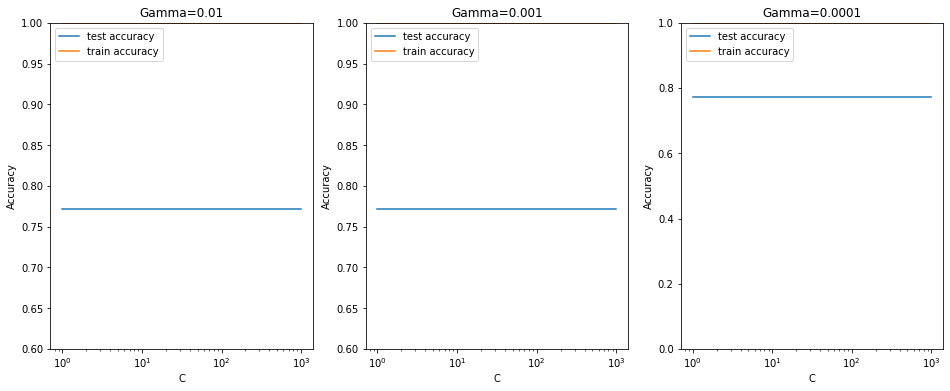

In [490]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [491]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.771551724137931 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


#### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [492]:
# model with optimal hyperparameters

# model
model = SVC(C=1, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")




accuracy 0.9705882352941176 



##### Our model can predict cognitive impairment without dementia with 97% accuracy

In [493]:
y_pred=svm.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0])

In [494]:
confusion_matrix(y_test, y_pred)

array([[70,  4],
       [ 4, 58]])

In [495]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0])

## Clustering

### K means clustering

Our algorithm works as follows, assuming we have inputs 
x
1
,
x
2
,
x
3
,
.
.
.
,
x
n
x 
1
​	 ,x 
2
​	 ,x 
3
​	 ,...,x 
n
​	  and value of K

Step 1 - Pick K random points as cluster centers called centroids.

Step 2 - Assign each 
x
i
x 
i
​	  to nearest cluster by calculating its distance to each centroid.

 
Step 3 - Find new cluster center by taking the average of the assigned points.

Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

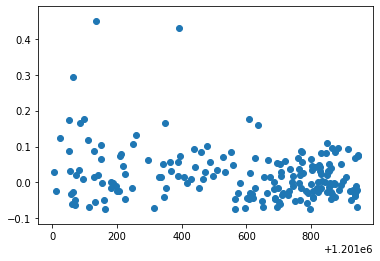

In [496]:
plt.scatter(df['houseid2'],df['dfscore'])

From the above plot, it is implied that three clusters can be obtained.

In [497]:
df_clustering = df.drop(columns = ['cind'])
#Selecting 2 random features from the dataset for clustering
#Here we choose houseid2 @ column 79 and dfscore @ column 80
X = df_clustering.iloc[:, [0,131]].values

In [498]:
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)  

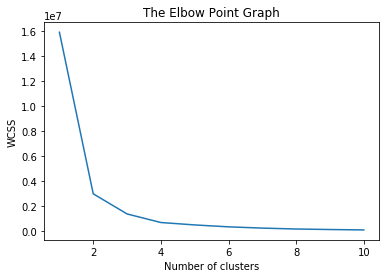

In [499]:
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [500]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

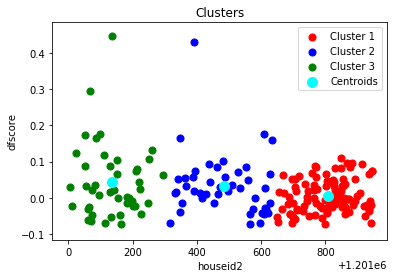

In [501]:
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50 
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50 
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('houseid2')
plt.ylabel('dfscore')
plt.legend()
plt.show()

## Association Analysis

We find the features with high correlation and use them for our association analysis

In [502]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["cind"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

cdr                0.684934
immed              0.560671
recall_original    0.644894
cind               1.000000
smitot             0.609365
smicase            0.695249
mcimem             1.000000
mci                0.475843
mcinosmi           0.989663
mcinonam_pure      1.000000
Q363_              0.543090
Q364_              0.543090
Q365_              0.556082
Name: cind, dtype: float64

In [503]:
dfa=df[['cdr','immed','recall_original','cind','smitot','smicase','mcimem','mci','mcinosmi','mcinonam_pure','CHOREDIS_0']]

We convert all the values more than 0 to 1 and the rest to 0

In [504]:
def encode_units(x):
    if x<=0:
        return 0
    else:
        return 1
dfa=dfa.applymap(encode_units)
dfa.sample(5)

,cdr,immed,recall_original,cind,smitot,smicase,mcimem,mci,mcinosmi,mcinonam_pure,CHOREDIS_0
113,0,1,1,0,1,1,0,0,0,1,0
100,1,1,1,0,1,1,0,0,0,1,0
102,0,1,1,0,1,1,0,0,0,1,0
29,1,1,1,0,1,1,0,0,0,1,1
18,1,1,0,1,0,0,1,0,1,0,1


We find the frequent item sets with support of minimum 7%

In [505]:
freq_items = apriori(dfa, min_support=0.07, use_colnames=True)

In [506]:
freq_items.head(7)

,support,itemsets
0,0.658031,(cdr)
1,0.932642,(immed)
2,0.782383,(recall_original)
3,0.476684,(cind)
4,0.823834,(smitot)
5,0.694301,(smicase)
6,0.476684,(mcimem)


### Mining Association Rules

Frequent if-then associations called association rules which consists of an antecedent (if) and a consequent (then).

In [507]:
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7801,"(smitot, mcimem)","(mci, cind, recall_original, cdr)",0.300518,0.119171,0.119171,0.396552,3.327586,0.083358,1.459660
1673,"(smitot, mci)","(cind, recall_original)",0.170984,0.264249,0.119171,0.696970,2.637552,0.073989,2.427979
9394,"(mcinosmi, immed)","(mcimem, cind, recall_original, mci)",0.404145,0.119171,0.119171,0.294872,2.474359,0.071009,1.249176
6628,"(mcinosmi, mcimem, recall_original, mci, cdr)",(immed),0.119171,0.932642,0.119171,1.000000,1.072222,0.008027,inf
6056,"(mcinosmi, immed, cind, mci, cdr)",(recall_original),0.150259,0.782383,0.119171,0.793103,1.013702,0.001611,1.051813


### Visualizing results

#### Support vs Confidence

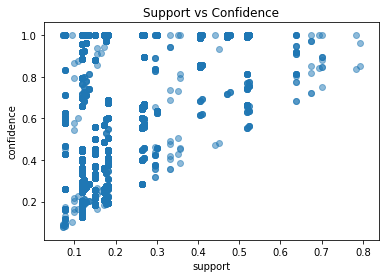

In [508]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Support vs Lift

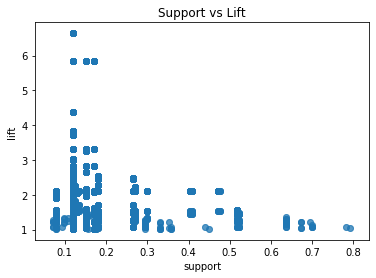

In [509]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### Lift vs Confidence

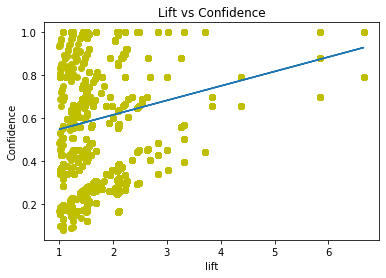

In [510]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))
plt.ylabel('Confidence')
plt.xlabel('lift')
plt.title('Lift vs Confidence');

## Results

Classification- Cognitive impairment without demantia is predicted with 97% accuracy.

Clustering- dfscores of different patients are represented in three clusters.

Association- We find the various frequent item sets and their relation to one another